# The Convolution Operation

In [ ]:
# run this cell first
!git clone https://github.com/mikedataCrunch/GMS5204.git
!mv ./GMS5204/* .
!rm ./GMS5204

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def apply_convolution(input_matrix, filter_matrix):
    """The convolution operation function. """
    
    # Get the dimensions of the input and filter
    input_height, input_width = input_matrix.shape[0], input_matrix.shape[1] 
    filter_height, filter_width = filter_matrix.shape
    
    # Calculate the dimensions of the output matrix
    output_height = input_height - filter_height + 1
    output_width = input_width - filter_width + 1
    
    # Initialize the output matrix
    output_matrix = np.zeros((output_height, output_width))
    
    # Perform the convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = input_matrix[i:i+filter_height, j:j+filter_width]
            output_matrix[i, j] = np.sum(region * filter_matrix)
    
    return output_matrix

## 1-Channel Matrix Examples

### Example 1

In [3]:
# Define the 6x6 input matrix
input_matrix = np.array([
    [3, 0, 2, 1, 6, 1],
    [8, 5, 3, 5, 2, 4],
    [9, 7, 3, 2, 6, 3],
    [0, 9, 0, 6, 9, 9],
    [1, 2, 3, 5, 2, 7],
    [7, 1, 2, 4, 3, 8],
])

# Define the 3x3 filter
filter_matrix = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
])

output_matrix = apply_convolution(input_matrix, filter_matrix)

print("Input Matrix:\n", input_matrix)
print("Filter Matrix:\n", filter_matrix)
print("Output Matrix:\n", output_matrix)


Input Matrix:
 [[3 0 2 1 6 1]
 [8 5 3 5 2 4]
 [9 7 3 2 6 3]
 [0 9 0 6 9 9]
 [1 2 3 5 2 7]
 [7 1 2 4 3 8]]
Filter Matrix:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Output Matrix:
 [[ 14.   9.   2.   3.]
 [ -7.   2.   5.  13.]
 [-13.  -2.  -1.   3.]
 [  1.  -8.  -6.  -9.]]


### Example 2

In [4]:
input_matrix = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [9, 9, 9, 9, 9, 9],
    [9, 9, 9, 9, 9, 9],
    [9, 9, 9, 9, 9, 9],
])

# Define the 3x3 filter
filter_matrix = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
])

output_matrix = apply_convolution(input_matrix, filter_matrix)

print("Input Matrix:\n", input_matrix)
print("Filter Matrix:\n", filter_matrix)
print("Output Matrix:\n", output_matrix)

Input Matrix:
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]]
Filter Matrix:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Output Matrix:
 [[ 0.  0.  0.  0.]
 [27. 27. 27. 27.]
 [27. 27. 27. 27.]
 [ 0.  0.  0.  0.]]


## Image examples

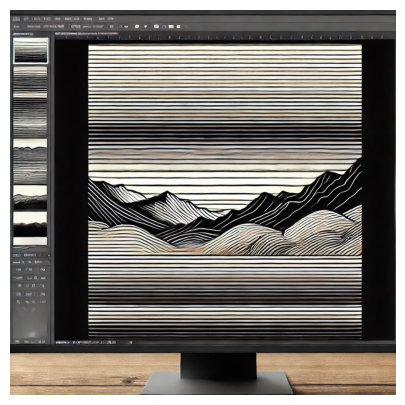

In [6]:
# Load the image
image_path =  "/content/media//h_edgy.jpeg"
image = Image.open(image_path)

fig, axs = plt.subplots(figsize=(10, 5))  # Adjust the figsize to make the images smaller
axs.imshow(image)
axs.axis('off')
plt.show()

In [7]:
# Example filters
filters = {
    # vertical edge detection: gradient along the horizontal is measured
    # Horizontal Sobel
    "hsobel": np.array([ 
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),
    # horizontal edge detection: gradient along the horizontal is measured
    # Vertical Sobel
    "vsobel": np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]),
    # vertical edge detection: gradient along the horizontal is measured
    # Horizontal Prewitt
    "hprewitt": np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]),
    # horizontal edge detection: gradient along the horizontal is measured
    # Vertical Prewitt
    "vprewitt": np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]),
    # Sharpen
    "sharpen": np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),
    # Box Blur
    "boxblur": np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])
}

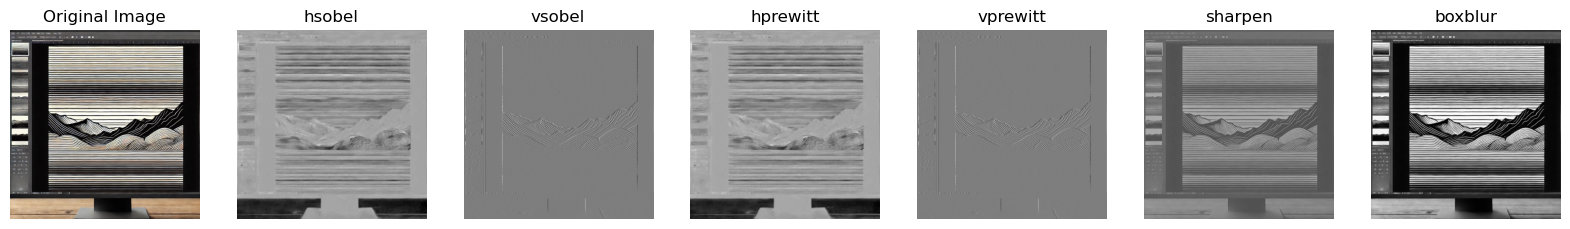

In [20]:
input_matrix = np.array(image)

# Apply each filter and display the results
fig, axs = plt.subplots(1, len(filters) + 1, figsize=(20, 8))
axs[0].imshow(input_matrix, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

for idx, (filter_name, filter_matrix) in enumerate(filters.items()):
    output_matrix = apply_convolution(input_matrix, filter_matrix)

    # Normalize the output to the range [0, 255]
    output_matrix_normalized = 255 * (output_matrix - np.min(output_matrix)) / (np.max(output_matrix) - np.min(output_matrix))
    output_matrix_normalized = output_matrix_normalized.astype(np.uint8)

    if filter_name == "hprewitt":
        temp = output_matrix_normalized
    axs[idx + 1].imshow(output_matrix_normalized, cmap='gray')
    axs[idx + 1].set_title(filter_name)
    axs[idx + 1].axis('off')

    # Save the output image
    output_image = Image.fromarray(output_matrix_normalized)
    output_image = output_image.convert('L')  # Ensure it is in grayscale mode
    # output_image.save(os.path.join(REPO_DIR, f'media/{filter_name}_output.jpg'))
    
# plt.savefig(os.path.join(REPO_DIR, 'media/cat_filters.jpg'), bbox_inches='tight')
plt.show()

## Padding

In [25]:
# Define the 6x6 input matrix
input_matrix = np.array([
    [3, 0, 2, 1, 6, 1],
    [8, 5, 3, 5, 2, 4],
    [9, 7, 3, 2, 6, 3],
    [0, 9, 0, 6, 9, 9],
    [1, 2, 3, 5, 2, 7],
    [7, 1, 2, 4, 3, 8],
])

# Define the 3x3 filter
filter_matrix = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
])

# APPLY PADDING
pad_value = 0
pad_width = 1 # p
padded_input_matrix = np.pad(
    input_matrix, pad_width=1, mode='constant', constant_values=0
)

output_matrix = apply_convolution(padded_input_matrix, filter_matrix)

print("Input Matrix SHAPE:\n", input_matrix.shape)
print("Padded Input Matrix SHAPE:\n", input_matrix.shape)
print("Filter Matrix SHAPE:\n", filter_matrix.shape)
print("Output Matrix SHAPE:\n", output_matrix.shape)

print("Output Matrix:\n", output_matrix)

Input Matrix SHAPE:
 (6, 6)
Padded Input Matrix SHAPE:
 (6, 6)
Filter Matrix SHAPE:
 (3, 3)
Output Matrix SHAPE:
 (6, 6)
Output Matrix:
 [[ 13.  16.  13.  10.  11.   6.]
 [ 13.  14.   9.   2.   3.   2.]
 [ -4.  -7.   2.   5.  13.  12.]
 [-13. -13.  -2.  -1.   3.   0.]
 [ -1.   1.  -8.  -6.  -9.  -7.]
 [ -3.  -6. -10. -10. -14.  -9.]]


## Strides

In [26]:
# UPDATED convolution operation
def apply_convolution(input_matrix, filter_matrix, pad_size=0, pad_value=0, stride=1):
    # Apply zero padding to the input matrix
    padded_matrix = np.pad(input_matrix, pad_width=pad_size, mode='constant', constant_values=pad_value)
    
    # Get the dimensions of the padded input and filter
    padded_height, padded_width = padded_matrix.shape
    filter_height, filter_width = filter_matrix.shape
    
    # Calculate the dimensions of the output matrix
    output_height = (padded_height - filter_height) // stride + 1
    output_width = (padded_width - filter_width) // stride + 1
    
    # Initialize the output matrix
    output_matrix = np.zeros((output_height, output_width))
    
    # Perform the convolution operation
    for i in range(0, output_height):
        for j in range(0, output_width):
            current_region = padded_matrix[i*stride:i*stride+filter_height, j*stride:j*stride+filter_width]
            output_matrix[i, j] = np.sum(current_region * filter_matrix)
    
    return output_matrix

In [27]:
# APPLY PADDING
pad_value = 0
pad_width = 1 # p

# CHANGE STRIDE to 2
stride = 2

output_matrix = apply_convolution(
    input_matrix, filter_matrix, 
    pad_size=pad_width, pad_value=pad_value, 
    stride=stride
)

print("Input Matrix SHAPE:\n", input_matrix.shape)
print("Padded Input Matrix SHAPE:\n", input_matrix.shape)
print("Filter Matrix SHAPE:\n", filter_matrix.shape)
print("Output Matrix SHAPE:\n", output_matrix.shape)

print("Output Matrix:\n", output_matrix)

Input Matrix SHAPE:
 (6, 6)
Padded Input Matrix SHAPE:
 (6, 6)
Filter Matrix SHAPE:
 (3, 3)
Output Matrix SHAPE:
 (3, 3)
Output Matrix:
 [[13. 13. 11.]
 [-4.  2. 13.]
 [-1. -8. -9.]]


## End